['imagedata\\1-2.jpg', 'imagedata\\1.jpg', 'imagedata\\2-2.jpg', 'imagedata\\2_1.jpg', 'imagedata\\3_1.jpg', 'imagedata\\4_1.jpg', 'imagedata\\5_1.jpg', 'imagedata\\6_1.jpg', 'imagedata\\7.jpg', 'imagedata\\7_2.jpg', 'imagedata\\9_1.jpg', 'imagedata\\9_2.jpg', 'imagedata\\9_3.jpg']
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 

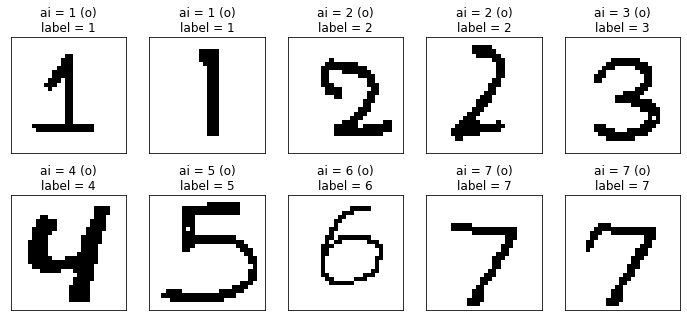

In [1]:
#Prg11 載入預先訓練好的模型

import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立測試特徵集、測試標籤	    
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
print(files)

for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
    
test_feature=np.array(test_feature) #把串列轉為矩陣
test_label=np.array(test_label) #把串列轉為矩陣

print(test_feature)
print(test_label)

#將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_mlp_model.h5")
model = load_model('Mnist_mlp_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)